In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [3]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train,x_test=x_train/255,x_test/255
print(x_train.shape)

(60000, 28, 28)


In [4]:
#the data is 2d
#convolution expecst height x width x color
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


In [5]:
#no of classes

k=len(set(y_train))
print("no of classes:",k)

no of classes: 10


In [6]:
#build the model using functionaln api
i=tf.keras.layers.Input(shape=x_train[0].shape)
x=tf.keras.layers.Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=tf.keras.layers.Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=tf.keras.layers.Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(512,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(k,activation='softmax')(x)
model=tf.keras.Model(i,x)

In [9]:
from keras.engine.training import optimizer
#compile and fit
#note make sure you are using GPU for this
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1212 - accuracy: 0.9533 - val_loss: 0.3622 - val_accuracy: 0.9030
Epoch 2/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1158 - accuracy: 0.9556 - val_loss: 0.3693 - val_accuracy: 0.9015
Epoch 3/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1089 - accuracy: 0.9579 - val_loss: 0.4165 - val_accuracy: 0.8996
Epoch 4/15
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1070 - accuracy: 0.9590 - val_loss: 0.3996 - val_accuracy: 0.9022
Epoch 5/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1026 - accuracy: 0.9612 - val_loss: 0.4307 - val_accuracy: 0.8982
Epoch 6/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0992 - accuracy: 0.9625 - val_loss: 0.4254 - val_accuracy: 0.8984
Epoch 7/15
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0954 - accuracy: 0.9638 - val_loss: 0.4257 -

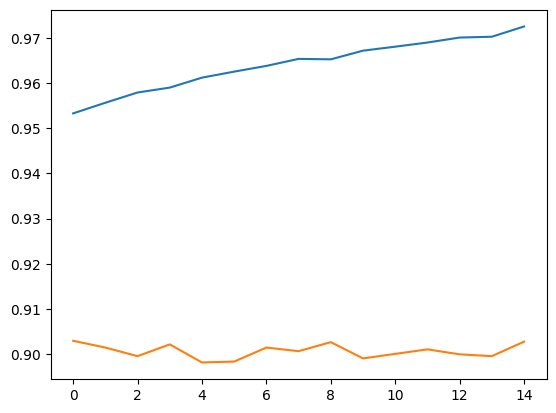

In [10]:
plt.plot(r.history['accuracy'],label="accuracy")
plt.plot(r.history['val_accuracy'],label='val_accuracy')

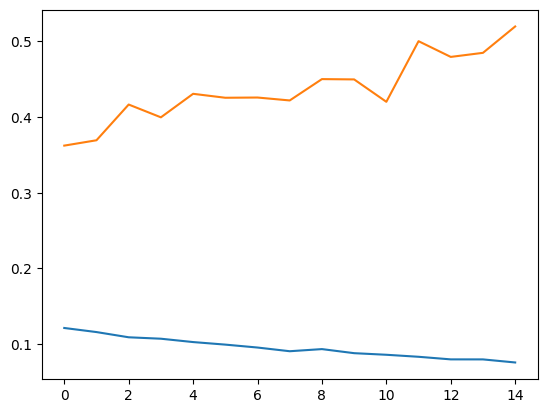

In [11]:
plt.plot(r.history['loss'],label="loss")
plt.plot(r.history['val_loss'],label='val_loss')

313/313 [==============================] - 3s 10ms/step
confusion matrix without normalization
cm


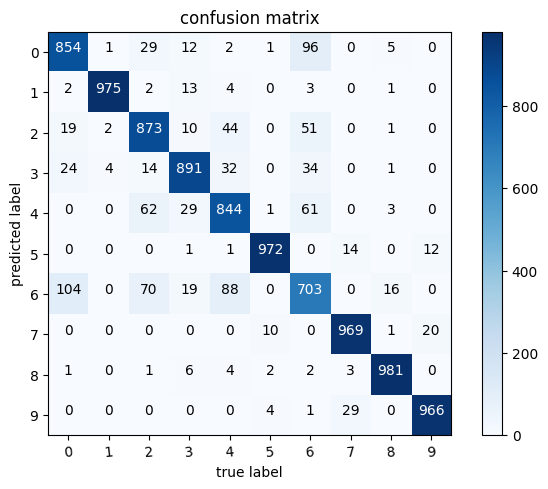

In [12]:
#ploting confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm,classes,normalise=False,
                         title='confusion matrix',
                         cmap=plt.cm.Blues):
  ''' this function prints and plots the confusion matrix
  normalization can be applied by setting normalize=True
  '''
  if normalise:
      cm=cm.astype('float')/cm.sum(axis=1)[:,np.new_axis]
      print("normalize confusion matrix")
  else:
        print("confusion matrix without normalization")
        print("cm")
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=5)
  plt.yticks(tick_marks,classes)

  fmt='.2f' if normalise else "d"
  thresh=cm.max()/2
  for i ,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center',color='white'if cm[i,j] >thresh else "black" )
  plt.tight_layout()
  plt.xlabel("true label")
  plt.ylabel('predicted label')
  plt.show()



p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

Text(0.5, 1.0, 'true label: 6 predicted: 3')

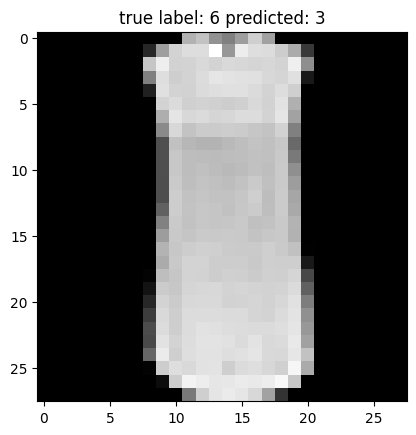

In [14]:

#show some misclassified example
misclassified_idx=np.where(p_test!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title("true label: %s predicted: %s"%(y_test[i],p_test[i]))